# Getting started with Task 3

Download the dataset from the [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) using the script `download_intracardiac_dataset.sh`:

```bash
source download_intracardiac_dataset.sh
```

## Load Modules and Preprocessing Functions

Load modules and preprocessing functions.

In [ ]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_path = '/content/drive/MyDrive/cardiac_challenge_team6'
local_path = '../'

Load the `cardiac_ml_tools` module.

In [ ]:
%run $drive_path/notebooks/cardiac_ml_tools.py

## Load the dataset

In [ ]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR=f'{drive_path}/intracardiac_dataset/' # This should be the path to the intracardiac_dataset, it can be downloaded using data_science_challenge_2023/download_intracardiac_dataset.sh
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[0][0], file_pairs[0][1]))


Number of file pairs: 16117
Example of file pair:
/content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.0.volunteer.v13.npy
/content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/VmData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.0.volunteer.v13.npy


## Dataset details

The dataset [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106)
consists of pairs of computationally simulated intracardiac transmembrane voltage recordings and ECG signals.
In total, 16140 organ-level simulations were conducted to create this dataset.
Simulations were performed using Lassen supercomputer at Lawrence Livermore National Lab (LLNL), concurrently utilizing 4 GPUs and 40 CPU cores.
Each simulation produced pairs of 500ms-by-10 raw electrode signals and 500ms-by-75 transmembrane voltage signals.
For convenience, we collect those signals in matrices and give them the following names:

Tensor | Description | Shape | Notes
--- | --- | --- | ---
$X$ | Row electrode signals | $10 \times 500$ | 10-lead ECG signals from the simulated torso (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$V$ | Activation map | $75 \times 500$ | Transmembrane voltage signals from the simulated heart (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$E$ | 12-lead ECG signals | $12 \times 500$ | 12-lead ECG signals obtained by `get_standard_leads`($X$)
$A$ | Activation map | $75 \times 1$ | Activation time, defined as $A_i = \text{min}_j(V_{ij})$

**IMPORTANT** : The raw data in the dataset consists of 10-lead ECG signals and 75-lead transmembrane voltage signals. The 12-lead ECG signals are obtained from the 10-lead ECG signals using the function `get_standard_leads` (in the file `cardiac_ml_tools.py`).

The overall generation process is shown in the following image. The ECG signal is recorded using 10 virtual electrodes and the transmembrane voltages are recorded at 75 points within the myocardium. The transmembrane voltages are then used to generate the spatio-temporal activation maps.

![ECG 10 2 12](../figures/data_generation.png)

## Getting the standard 12-lead ECG from the 10-lead ECG

The function `get_standard_leads` (in the file `cardiac_ml_tools.py`) is used to obtain the 12-lead ECG signals from the 10-lead ECG signals. It implements the following transformation, where the (Wilson Lead) is defined as $Vw = 1/3*(RA + LA + LL)$:
$$
\left\{
\begin{array}{lll}
    X_{:,1}  & \to  & RA \\
    X_{:,2}  & \to  & LA \\
    X_{:,3}  & \to  & LL \\
    X_{:,4}  & \to  & RL \\
    X_{:,5}  & \to  & V1 \\
    X_{:,6}  & \to  & V2 \\
    X_{:,7}  & \to  & V3 \\
    X_{:,8}  & \to  & V4 \\
    X_{:,9}  & \to  & V5 \\
    X_{:,10} & \to &  V6 \\
\end{array}
\right.
\text{        and        }
\left\{
\begin{array}{lll}          
\text{Lead } I& : & LA - RA \\
\text{Lead } II& : & LL - RA \\
\text{Lead } III& : & LL - LA \\
\text{Lead } aVR& : &  \frac{3}{2} (RA - Vw) \\
\text{Lead } aVL& : &  \frac{3}{2} (LA - Vw) \\
\text{Lead } aVF& : &  \frac{3}{2} (LL - Vw)\\
\text{Lead } V1 & : & V1 - Vw \\
\text{Lead } V2 & : & V2 - Vw \\
\text{Lead } V3 & : & V3 - Vw \\
\text{Lead } V4 & : & V4 - Vw \\
\text{Lead } V5 & : & V5 - Vw \\
\text{Lead } V6 & : & V6 - Vw \\
\end{array}
\right.
$$

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


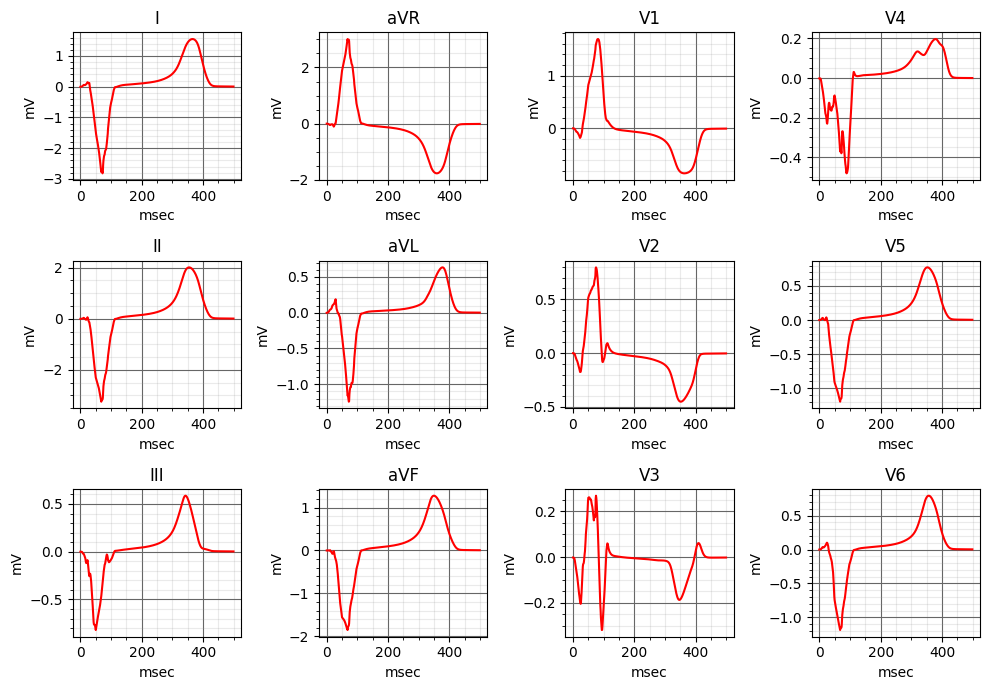

In [ ]:
# Example of file pair
case = 213
# ECG plot
row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

## Getting the activation map from the transmembrane voltages

The funtion `get_activation_map` (in the file `cardiac_ml_tools.py`) is used to obtain the activation map from the transmembrane voltages. It implements the following transformation $A_i = \text{min}_j(V_{ij})$.

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


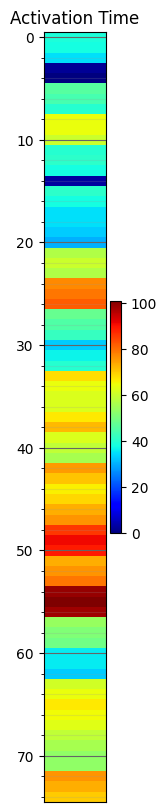

In [ ]:
# Example of file pair
case = 213
plt.figure(figsize=(1, 10))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

ActTime = get_activation_time(VmData)

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


## Task 3: Learning the mapping from the 12-lead ECG to the activation map

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy
Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


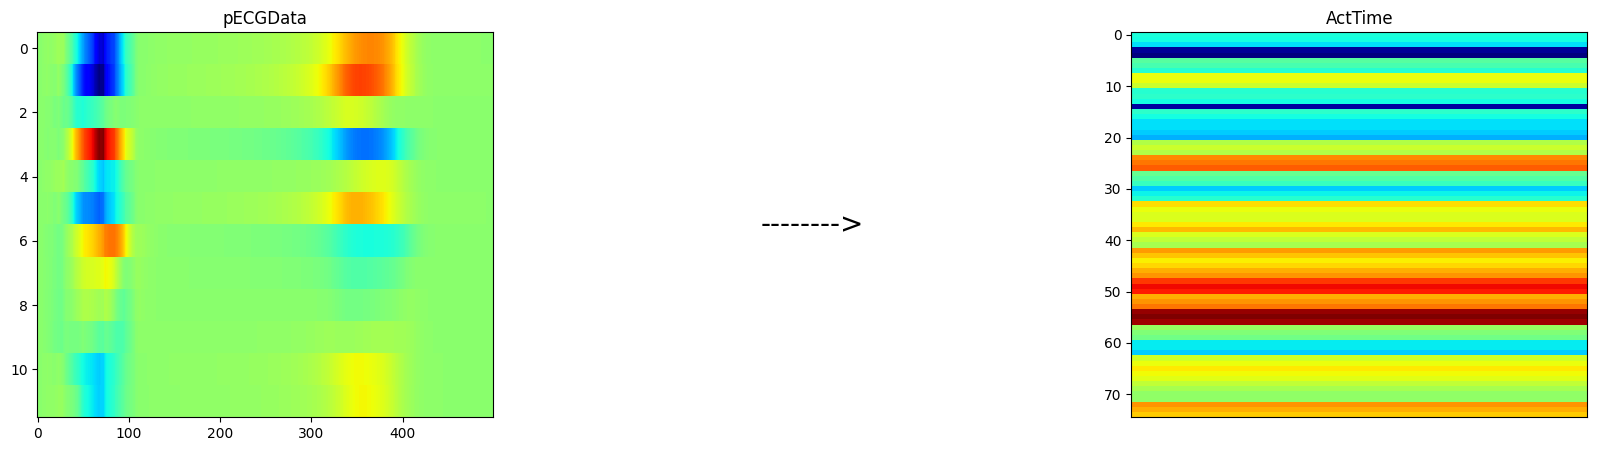

In [ ]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])
ActTime = get_activation_time(VmData)

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print an arrow
plt.text(0.5, 0.5, '-------->', horizontalalignment='center', verticalalignment='center', fontsize=20)
plt.axis('off')
plt.subplot(row, column, 3)
# plot ActTime
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('ActTime')
plt.show()
plt.close()

# Tricks

- As in many machine learning problems, normalization of the data might be helpful or even necessary. Different normalization schemes might be applied.

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Dense, BatchNormalization, AveragePooling1D
from tensorflow.keras import Sequential
import pickle

In [3]:
# load data from files into numpy arrays

ECG_Data = np.load(f'{drive_path}/Task_3_4_Data/ECG_Data.npy')
ActTimes = np.load(f'{drive_path}/Task_3_4_Data/Activation_Times.npy')
VMData = np.load(f'{drive_path}/Task_3_4_Data/VmData.npy')

NameError: ignored

In [ ]:
# load norm data
ecg_data_norm = np.load(f'{drive_path}/Task_3_4_Data_norm/ECG_Data_NORM.npy')
vm_data_norm = np.load(f'{drive_path}/Task_3_4_Data_norm/VmData_NORM.npy')
act_data_norm = np.load(f'{drive_path}/Task_3_4_Data_norm/Activation_Times_NORM.npy')

In [ ]:
# split data

x_train, x_temp, y_train, y_temp = train_test_split(
    ecg_data_norm, act_data_norm, test_size=.3, random_state=24
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=.5, random_state=24
)

print(x_train.shape, y_train.shape)

(11281, 500, 12) (11281, 75, 1)


In [ ]:
def R2(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.truediv(residual, total))
  return r2

In [ ]:
# Define the PyTorch model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=12, out_channels=75, kernel_size=2, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(75)
        '''self.conv2 = nn.Conv1d(in_channels=75, out_channels=75, kernel_size=5, stride=3, padding=1)
        self.conv3 = nn.Conv1d(in_channels=75, out_channels=75, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(75)
        self.conv4 = nn.Conv1d(in_channels=75, out_channels=75, kernel_size=16, stride=2, padding=1)
        self.bn3 = nn.BatchNorm1d(75)'''
        self.fc = nn.Linear(in_features=75, out_features=1)

    def forward(self, x):
        x = nn.ReLU()(self.bn1(self.conv1(x)))
        #x = nn.ReLU()(self.conv2(x))
        #x = nn.ReLU()(self.bn2(self.conv3(x)))
        #x = nn.ReLU()(self.bn3(self.conv4(x)))
        #x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


convnet_model = ConvNet()
print(convnet_model)

ConvNet(
  (conv1): Conv1d(12, 75, kernel_size=(2,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=75, out_features=1, bias=True)
)


In [ ]:
# Convert the NumPy arrays to PyTorch tensors
print(x_train.shape, x_val.shape)
x_train_pytorch = np.reshape(x_train, (x_train.shape[0], x_train.shape[2], x_train.shape[1]))
print(x_train_pytorch.shape)
x_val_pytorch = np.reshape(x_val, (x_val.shape[0], x_val.shape[2], x_val.shape[1]))
print(x_val_pytorch.shape)

x_train_tensor = torch.tensor(x_train_pytorch, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val_pytorch, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = Adam(convnet_model.parameters(), lr=0.001)

# Training loop
epochs = 5
batch_size = 64
num_train_samples = len(x_train_tensor)

for epoch in range(epochs):
    for i in range(0, num_train_samples, batch_size):
        # Get the current batch
        batch_x = x_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = convnet_model(batch_x)

        # Compute the loss
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Validation after each epoch
    with torch.no_grad():
        val_outputs = convnet_model(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss.item():.4f}")


(12893, 500, 12) (3224, 500, 12)
(12893, 12, 500)
(3224, 12, 500)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4800x501 and 75x1)

In [ ]:
#define model

# output_shape = ((input_shape - kernel_size) / stride) + 1
convnet_model = Sequential()

convnet_model.add(Conv1D(filters=75, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(500,12)))
convnet_model.add(AveragePooling1D())
convnet_model.add(BatchNormalization())
convnet_model.add(Conv1D(filters=32, kernel_size=3, strides=3, padding='same', activation='relu'))
convnet_model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
convnet_model.add(BatchNormalization())
convnet_model.add(Conv1D(filters=128, kernel_size=16, strides=1, padding='same', activation='relu'))
convnet_model.add(Conv1D(filters=128, kernel_size=16, strides=1, padding='same', activation='relu'))
convnet_model.add(BatchNormalization())
convnet_model.add(Conv1D(filters=64, kernel_size=16, strides=1, padding='same', activation='relu'))
convnet_model.add(Conv1D(filters=32, kernel_size=10, strides=1, activation='relu'))
convnet_model.add(BatchNormalization())

convnet_model.add(Dense(units=1))

print(convnet_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 500, 75)           1875      
                                                                 
 average_pooling1d (AverageP  (None, 250, 75)          0         
 ooling1D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 250, 75)          300       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 32)            7232      
                                                                 
 conv1d_2 (Conv1D)           (None, 84, 64)            6208      
                                                                 
 batch_normalization_1 (Batc  (None, 84, 64)           2

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
else:
    print("Cry")

print(tf.config.list_physical_devices('CPU'))
print(tf.config.list_physical_devices('GPU'))

print(torch.cuda.is_available)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_available at 0x7c58000ece50>


In [ ]:
# fit model

convnet_model.compile(optimizer='adam', loss='mse', metrics=[R2])
hist = convnet_model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=150,
    batch_size=64,
    verbose=1
)

Epoch 1/200
177/177 [==============================] - 9s 20ms/step - loss: 0.0093 - R2: 0.7343 - val_loss: 0.0097 - val_R2: 0.7213
Epoch 2/200
177/177 [==============================] - 3s 15ms/step - loss: 0.0078 - R2: 0.7766 - val_loss: 0.0084 - val_R2: 0.7589
Epoch 3/200
177/177 [==============================] - 4s 22ms/step - loss: 0.0073 - R2: 0.7920 - val_loss: 0.0077 - val_R2: 0.7798
Epoch 4/200
177/177 [==============================] - 3s 15ms/step - loss: 0.0071 - R2: 0.7969 - val_loss: 0.0068 - val_R2: 0.8051
Epoch 5/200
177/177 [==============================] - 3s 17ms/step - loss: 0.0065 - R2: 0.8131 - val_loss: 0.0064 - val_R2: 0.8173
Epoch 6/200
177/177 [==============================] - 3s 16ms/step - loss: 0.0062 - R2: 0.8215 - val_loss: 0.0060 - val_R2: 0.8284
Epoch 7/200
177/177 [==============================] - 3s 15ms/step - loss: 0.0058 - R2: 0.8334 - val_loss: 0.0059 - val_R2: 0.8309
Epoch 8/200
177/177 [==============================] - 3s 15ms/step - loss: 

In [ ]:
convnet_model.save(f'{drive_path}/task_3_act_times_R29663.h5')

In [1]:
tf.keras.utils.get_custom_objects().update({'R2': R2})
convnet_model = tf.keras.models.load_model(f'{drive_path}/task_3_act_times_R29663.h5')

with open(f'{drive_path}/trained_models/task_3_act_times_R2.9663.pkl', 'wb') as file:
    pickle.dump(hist.history, file)

NameError: ignored

In [ ]:
def act_unnorm(norm_act_times, min_act_time, max_act_time):
  act_unnorm = np.zeros((norm_act_times.shape[0], 75, 1))

  for i, heart in enumerate(norm_act_times):
    for j, time in enumerate(heart):
      scaled = time[0]
      original = scaled * (max_act_time - min_act_time) + min_act_time
      act_unnorm[i][j][0] = original
  return act_unnorm

min_act_time = np.amin(ActTimes, axis=(0,1))[0]
max_act_time = np.amax(ActTimes, axis=(0,1))[0]

y_test_unnorm = act_unnorm(y_test, min_act_time, max_act_time)

In [ ]:
y_pred = convnet_model.predict(x_test)
y_pred_unnorm = act_unnorm(y_pred, min_act_time, max_act_time)
diff =  abs( y_pred_unnorm - y_test_unnorm )
print(np.mean(diff))

76/76 [==============================] - 0s 5ms/step
6.2010491531978245


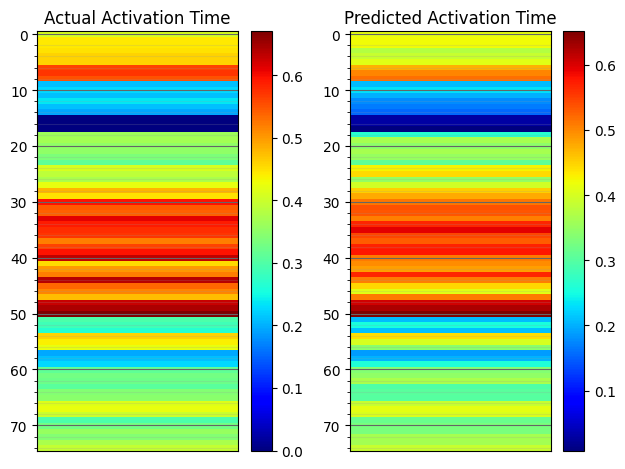

In [ ]:
# plot the Activation Time array
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(y_test[2000], cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Actual Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.subplot(1,2,2)
plt.imshow(y_pred[2000], cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Predicted Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

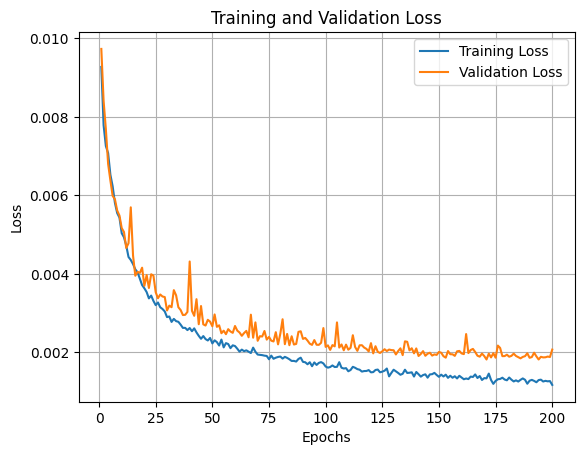

In [ ]:
# Get the training and validation loss values from the history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a plot to visualize the loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'R2', 'val_loss', 'val_R2'])


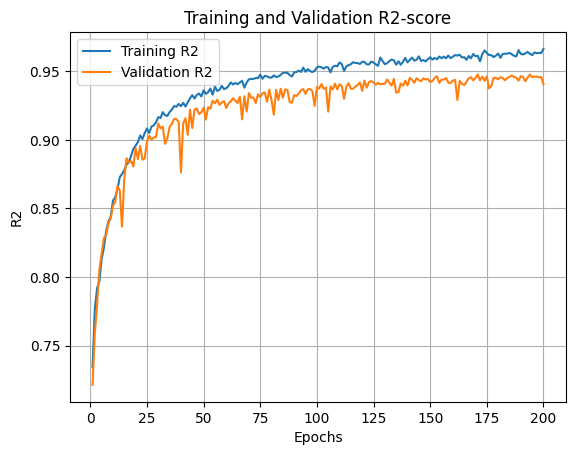

In [ ]:
# Get the training and validation R2 values from the history
R2 = hist.history['R2']
val_R2 = hist.history['val_R2']

# Create a plot to visualize R2 over epochs
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, R2, label='Training R2')
plt.plot(epochs, val_R2, label='Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.title('Training and Validation R2-score')
plt.legend()
plt.grid()
plt.show()